In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML, Math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

## Diagramma di Nyquist

In questo esempio, daremo uno sguardo al diagramma di Nyquist, un grafico progettato per rappresentare le caratteristiche di risposta in frequenza di un sistema Lineare Tempo-Invariante (LTI).
Il diagramma può essere costruito in due modi:
<ul>
    <li>
        O come una curva parametrica sul piano complesso, dove la frequenza ($j\omega$) è il parametro lungo il quale vengono tracciati i valori complessi della funzione di trasferimento.
    </li>
    <li>
        Oppure può essere definito in un sistema di coordinate polari, dove il guadagno della funzione di trasferimento è il valore radiale e la coordinata angolare è la fase.
    </li>
</ul>

<br><b>Seleziona un tipo di sistema!</b>

In [2]:
def print_model(model):
    
    print ('\nModello del sistema selezionato:')

    if model == 0:
        display(Math(r'$$G(s)=\frac{s-Z}{s-P}$$'))
    elif model == 1:
        display(Math(r'$$G(s)=\frac{K_i(s-Z)}{s(s-P)}$$'))
    elif model == 2:
        display(Math(r'$$G(s)=\frac{K_d\cdot s}{(s-P)}$$'))
    elif model == 3:
        display(Math(r'$$G(s)=\frac{s-Z}{(s-P_1)(s-P_2)}$$'))
    else:
        display(Math(r'$$G(s)=\frac{s-Z}{s^2+2\zeta\omega_0s+{\omega_0}^2}$$'))
            

systemSelect = w.ToggleButtons(
    options=[('Primo ordine', 0), ('Primo ordine con integratore', 1), ('Primo ordine con zero nell\'origine', 2),
             ('Secondo ordine sovrasmorzato', 3), ('Secondo ordine sottosmorzato', 4)],
    description='Sistema: ', layout=w.Layout(width='100%'))

systemSelect.style.button_width='48%'

input_data = w.interactive_output(print_model, {'model': systemSelect})

display(systemSelect, input_data)

ToggleButtons(description='Sistema: ', layout=Layout(width='100%'), options=(('Primo ordine', 0), ('Primo ordi…

Output()

<b>Seleziona i parametri del sistema; osserva i cambiamenti nel diagramma di Nyquist!</b>

In [3]:
def calculate_tf(P1, P2, Z, Zb, model, P1s, P2s, Zs):
    
    if P1s:
        p1_sig = -1
    else:
        p1_sig = 1
        
    if P2s:
        p2_sig = -1
    else:
        p2_sig = 1
        
    if Zs:
        z_sig = -1
    else:
        z_sig = 1
    
    if model == 0:
        if Zb:
            W = c.tf([1, z_sig*Z], [1, p1_sig*P1])
        else:
            W = c.tf([1], [1, p1_sig*P1])
    elif model == 1:
        if Zb:
            W = c.tf([p2_sig*P2, z_sig*p2_sig*P2*Z], [1, -p1_sig*P1, 0])
        else:
            W = c.tf([p2_sig*P2], [1, p1_sig*P1, 0])
    elif model == 2:
         W = c.tf([p2_sig*P2, 0], [1, p1_sig*P1])
    elif model == 3:
        if Zb:
            W = c.tf([1, z_sig*Z], [1, p1_sig*P1+p2_sig*P2, p1_sig*P1*p2_sig*P2])
        else:
            W = c.tf([1], [1, p1_sig*P1+p2_sig*P2, p1_sig*P1*p2_sig*P2])
    else:
        if Zb:
            W = c.tf([1, z_sig*Z], [1, 2*p1_sig*P1*p2_sig*P2, p1_sig*p1_sig*P1*P1])
        else:
            W = c.tf([1], [1, 2*p1_sig*P1*p2_sig*P2, p1_sig*p1_sig*P1*P1])

    print('\n Funzione di trasferimento:')
    print(W)
    
    poles, zeros = c.pzmap(W, Plot=False)
    
    print('Zeri del sistema:')
    print(zeros)
    print('Poli del sistema:')
    print(poles)

def draw_controllers(model):
    
    global P1_slider, P2_slider, Z_slider, Z_button, P1s_button, P2s_button, Zs_button

    if model == 0:
        
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='Polo', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=True)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Zero', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Aggiungi/rimuovi lo zero',
                               layout=w.Layout(width='auto'), disabled=False)
        P1s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        P2s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=True)
        Zs_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)

    elif model == 1:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='Polo', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Ki', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Zero', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Aggiungi/rimuovi lo zero',
                               layout=w.Layout(width='auto'), disabled=False)
        P1s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        P2s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        Zs_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)

        
    elif model == 2:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='Polo', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Kd', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=True)
        Z_button = w.ToggleButton(value=True, description='Aggiungi/rimuovi lo zero',
                               layout=w.Layout(width='auto'), disabled=True)
        P1s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        P2s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        Zs_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=True)
        
    elif model == 3:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='Polo 1', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Polo 2', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Zero', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Aggiungi/rimuovi lo zero',
                               layout=w.Layout(width='auto'), disabled=False)
        P1s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        P2s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        Zs_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        
    else:
        P1_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description=r'$\omega_0$', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        P2_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description=r'$\zeta$', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description='Zero', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'), disabled=False)
        Z_button = w.ToggleButton(value=True, description='Aggiungi/rimuovi lo zero',
                               layout=w.Layout(width='auto'), disabled=False)
        P1s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=True)
        P2s_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        Zs_button = w.ToggleButton(value=False, description='-', layout=w.Layout(width='auto'), disabled=False)
        
    
    input_data2 = w.interactive_output(calculate_tf, {'P1': P1_slider, 'P2': P2_slider, 'Z': Z_slider,
                                                      'Zb': Z_button, 'model': systemSelect,
                                                      'P1s': P1s_button, 'P2s': P2s_button, 'Zs': Zs_button})
    
    display(w.HBox([P1s_button, P1_slider, P2s_button, P2_slider, Z_button, Zs_button, Z_slider]), input_data2)
    
    
w.interactive_output(draw_controllers, {'model': systemSelect})

Output()

Il diagramma di Nyquist intorno a $j\omega\rightarrow\infty$ è rappresentativo della forma della funzione di trasferimento; in base alla sua pendenza, è possibile determinare se la funzione è propria o strettamente propria.
$$ \lim_{s\to\infty}G(s) = \lim_{s\to\infty}\frac{b_ms^m + b_{m-1}s^{m-1}+ ... + b_0}{s^n + a_{n-1}s^{n-1}+ ... + a_0} \approx \frac{b_ms^m}{s^n}$$
<ul>
    <li>
        Per funzioni di trasferimento non proprie, in punto finale non può essere tracciato ($\pm\infty$).
    </li>
    <li>
        Per funzioni di trasferimento proprie, per le quali il grado dei polinomi del numeratore e del denominatore sono uguali ($m=n$), il punto finale è un numero reale diverso da zero.
    </li>
    <li>
        Per funzioni di trasferimento strettamente proprie, il punto finale è l'origine.
    </li>
</ul>

Il punto di partenza del diagramma può essere calcolato in modo simile:
<ul>
    <li>
        Per i sistemi con parte integrale, il punto di partenza non può essere tracciato.
    </li>
    <li>
        Per i sistemi con parte differenziale, il punto di partenza è l'origine.
    </li>
    <li>
        Negli altri casi, il punto di partenza è un numero reale diverso da zero.
    </li>
</ul>

<br><b>Sperimenta con queste propietà del diagramma di Nyquist!</b>

<IPython.core.display.Javascript object>


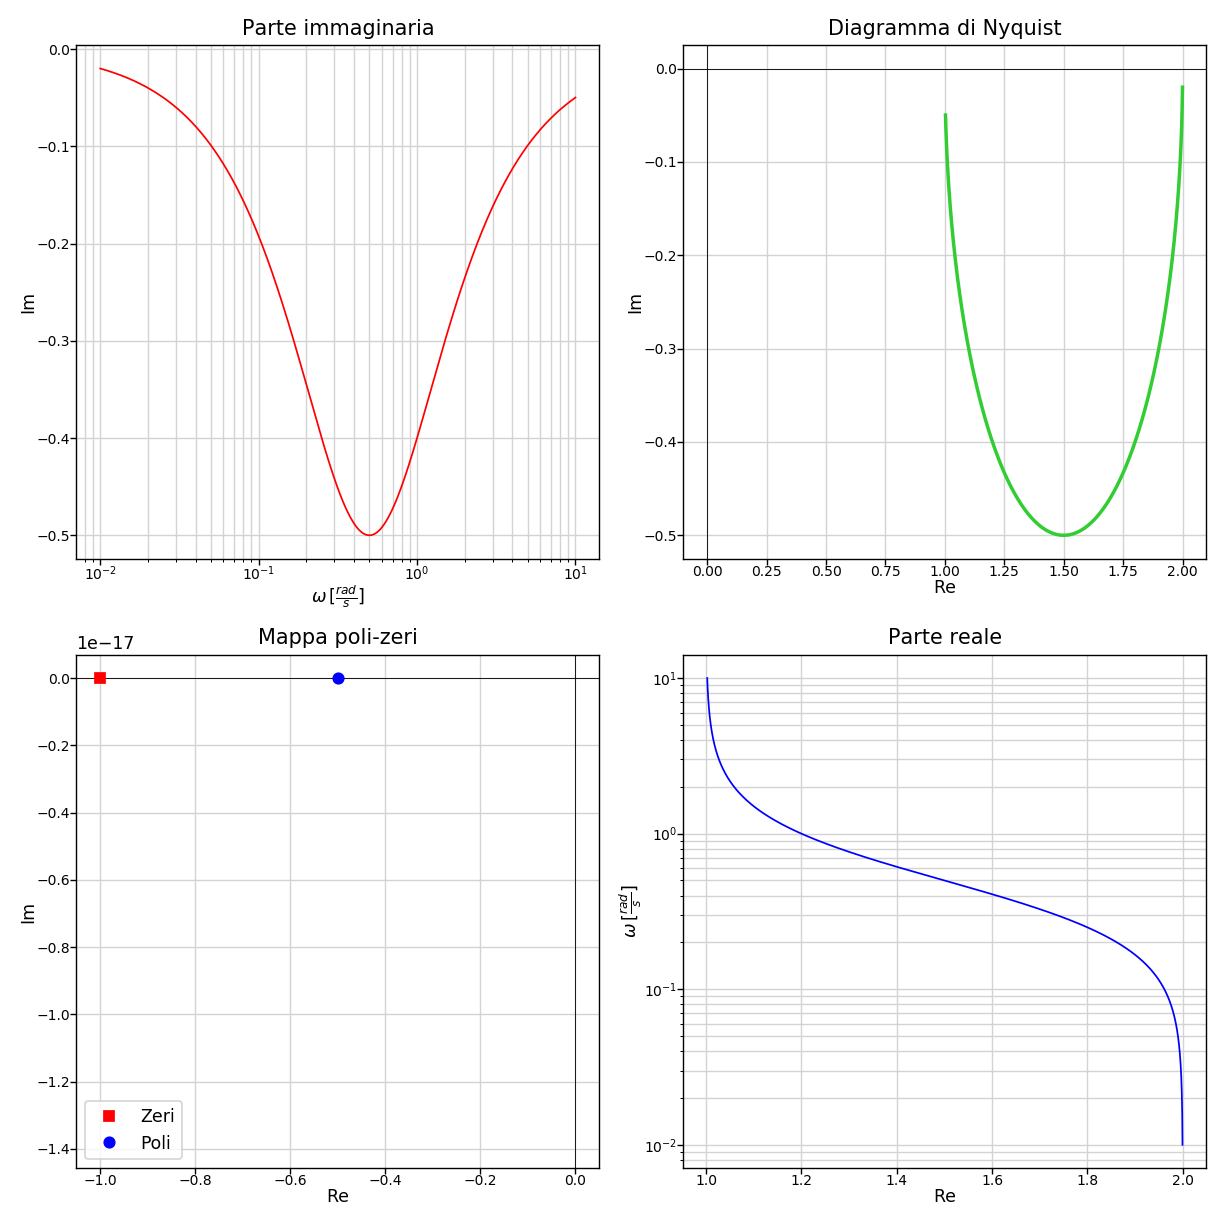

Output()

In [4]:
# Figure definition

fig1, ((f1_ax1, f1_ax2), (f1_ax3, f1_ax4)) = plt.subplots(2, 2)
fig1.set_size_inches((9.8, 9.8))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [], lw=1)
f1_line2, = f1_ax2.plot([], [], lw=1)
f1_line3, = f1_ax3.plot([], [], 'rs')
f1_line4, = f1_ax3.plot([], [], 'bo')
f1_line5, = f1_ax4.plot([], [], lw=1)

f1_ax2.axhline(y=0, color='k', lw=0.5)
f1_ax2.axvline(x=0, color='k', lw=0.5)
f1_ax3.axhline(y=0, color='k', lw=0.5)
f1_ax3.axvline(x=0, color='k', lw=0.5)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')
f1_ax3.grid(which='both', axis='both', color='lightgray')
f1_ax4.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='both')
f1_ax2.autoscale(enable=True, axis='both')
f1_ax3.autoscale(enable=True, axis='both')
f1_ax4.autoscale(enable=True, axis='both')

f1_ax1.set_title('Parte immaginaria', fontsize=12)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'Im', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Diagramma di Nyquist', fontsize=12)
f1_ax2.set_xlabel(r'Re', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'Im', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax3.set_title('Mappa poli-zeri', fontsize=12)
f1_ax3.set_xlabel(r'Re', labelpad=0, fontsize=10)
f1_ax3.set_ylabel(r'Im', labelpad=0, fontsize=10)
f1_ax3.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax4.set_title('Parte reale', fontsize=12)
f1_ax4.set_yscale('log')
f1_ax4.set_xlabel(r'Re', labelpad=0, fontsize=10)
f1_ax4.set_ylabel(r'$\omega\/[\frac{rad}{s}]$', labelpad=0, fontsize=10)
f1_ax4.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax3.legend([f1_line3, f1_line4], ['Zeri', 'Poli'])


# System model

def draw_nyquist(P1, P2, Z, Zb, model, P1s, P2s, Zs):
    
    if P1s:
        p1_sig = -1
    else:
        p1_sig = 1
        
    if P2s:
        p2_sig = -1
    else:
        p2_sig = 1
        
    if Zs:
        z_sig = -1
    else:
        z_sig = 1
    
    if model == 0:
        if Zb:
            W = c.tf([1, z_sig*Z], [1, p1_sig*P1])
        else:
            W = c.tf([1], [1, p1_sig*P1])
    elif model == 1:
        if Zb:
            W = c.tf([p2_sig*P2, z_sig*p2_sig*P2*Z], [1, -p1_sig*P1, 0])
        else:
            W = c.tf([p2_sig*P2], [1, p1_sig*P1, 0])
    elif model == 2:
         W = c.tf([p2_sig*P2, 0], [1, p1_sig*P1])
    elif model == 3:
        if Zb:
            W = c.tf([1, z_sig*Z], [1, p1_sig*P1+p2_sig*P2, p1_sig*P1*p2_sig*P2])
        else:
            W = c.tf([1], [1, p1_sig*P1+p2_sig*P2, p1_sig*P1*p2_sig*P2])
    else:
        if Zb:
            W = c.tf([1, z_sig*Z], [1, 2*p1_sig*P1*p2_sig*P2, p1_sig*p1_sig*P1*P1])
        else:
            W = c.tf([1], [1, 2*p1_sig*P1*p2_sig*P2, p1_sig*p1_sig*P1*P1])  
            
            
    _, _, ob = c.nyquist_plot(W, Plot=False)   # Small resolution plot to determine bounds        
    
    real, imag, omega = c.nyquist_plot(W, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 1000), Plot=False) # Nyquist-plot      
    poles, zeros = c.pzmap(W, Plot=False) # Poles and zeros   
    
    px = [x.real for x in poles] 
    py = [x.imag for x in poles]
    
    zx = [x.real for x in zeros]
    zy = [x.imag for x in zeros]
            
    global f1_line1, f1_line2, f1_line3, f1_line4, f1_line5
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    try:
        f1_ax3.lines.remove(f1_line3)
        f1_ax3.lines.remove(f1_line4)
    except:
        pass
    f1_ax4.lines.remove(f1_line5)

    f1_line1, = f1_ax1.plot(omega, imag, lw=1, color='red')    
    f1_line2, = f1_ax2.plot(real, imag, lw=2, color='limegreen')
    f1_line3, = f1_ax3.plot(zx, zy, 'rs') 
    f1_line4, = f1_ax3.plot(px, py, 'bo')
    f1_line5, = f1_ax4.plot(real, omega, lw=1, color='blue')    
    
    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax3.relim()
    f1_ax4.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    f1_ax3.autoscale_view()
    f1_ax4.autoscale_view()
    

def link_controls(model):
    w.interactive_output(draw_nyquist, {'P1': P1_slider, 'P2': P2_slider, 'Z': Z_slider,
                                     'Zb': Z_button, 'model': systemSelect,
                                     'P1s': P1s_button, 'P2s': P2s_button, 'Zs': Zs_button})
    
w.interactive_output(link_controls, {'model': systemSelect})